In [1]:
import cv2
print(cv2.__version__)

4.10.0


In [2]:
img = cv2.imread('lena.jpg',-1)

cv2.imshow('image',img)

# waits for user to press any key
# (this is necessary to avoid Python kernel form crashing)
cv2.waitKey(5000)

# closing all open windows
cv2.destroyAllWindows()

cv2.imwrite('lena_copy.jpg', img)

True

#### __Capture Video from Camera__

In [3]:
cam =cv2.VideoCapture(0)

while True:
   ret, frame = cam.read()
   # đảo chiều ảnh theo chiều ngang
   frame = cv2.flip(frame, 1)
   cv2.imshow('frame',frame)

   # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   # cv2.imshow('gray', gray)

   if cv2.waitKey(1) & 0xFF == ord('q'):
      break
   # if cv2.waitKey(1) & 0xFF == ord('s'):
   #    cv2.imwrite('capture.jpg', frame)
   #    break
   
cam.release()
cv2.destroyAllWindows()

__FourCC__ (Four Character Code) là một mã định dạng gồm 4 ký tự được sử dụng để xác định định dạng dữ liệu video hoặc codec nén. Nó thường được sử dụng trong các tệp video và thư viện xử lý video như OpenCV để chỉ định cách mã hóa/giải mã video.

In [29]:
cam = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480))
print(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
while (cam.isOpened()):
   ret, frame = cam.read()
   if ret == True:
      out.write(frame)
      cv2.imshow('frame', frame)
      if cv2.waitKey(1) & 0xFF == ord('q'):
         break
   else:
      break
cam.release()
out.release()
cv2.destroyAllWindows()

640.0
480.0


__Draw geometric shapes on images__

In [28]:
# img = cv2.imread('lena.jpg', -1)
import numpy as np
img = np.zeros([512,512,3],np.uint8)
print(img.shape)

img = cv2.line(img, (0,0),(255,255),(255,255,0), 10)

img = cv2.arrowedLine(img,(0,255), (255,255), (255,0,0,0), 10)

img = cv2.rectangle(img, (0,0), (255,255), (255,0,0),-1)

img = cv2.circle(img, (144,144), 140, (255,0,255), -1)

font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img, 'OpenCV', (10,500), font,4,(12,255,26),10,cv2.LINE_AA )


cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512, 3)


__Setting camera parameters__

In [33]:
cap = cv2.VideoCapture(0)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

cap.set(3,4000)
cap.set(4,2300)
print(cap.get(3))
print(cap.get(4))
while(cap.isOpened()):
   ret, frame = cap.read()
   if ret == True:
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      cv2.imshow('frame', gray)
      if cv2.waitKey(1) & 0xFF == ord('q'):
         break
   else:
      break

cap.release()
cv2.destroyAllWindows()

640.0
480.0
1280.0
720.0


__Show Date and Time on Videos using OpenCV Python__

In [35]:
import datetime

cap = cv2.VideoCapture(0)

while cap.isOpened():
   ret , frame = cap.read()
   if ret == True:
      font = cv2.FONT_HERSHEY_SIMPLEX
      datet = str(datetime.datetime.now())
      frame = cv2.putText(frame, datet, (10,50), font, 1,(0,255,255),2,cv2.LINE_AA)
      cv2.imshow('frame', frame)
      if cv2.waitKey(1) & 0xFF == ord('q'):
         break
   else:
      break
cap.release()
cv2.destroyAllWindows()

__Handle mouse events in OpenCV__

In [51]:
# events = [i for i in dir(cv2) if 'EVENT' in i]
# print(events)

def click_event(event, x, y, flags, params):
   if event == cv2.EVENT_LBUTTONDOWN:
      coordinate = str(x) + ", " + str(y)
      print(x,", ", y)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, coordinate, (x,y), font, 0.5, (255,255,0),2,cv2.LINE_AA)
      cv2.imshow('image', img)
   if event == cv2.EVENT_RBUTTONDOWN:
      blue = img[y,x,0]
      green = img[y,x,1]
      red = img[y,x,2]
      font = cv2.FONT_HERSHEY_SIMPLEX
      strRGB = str(blue) + ", " + str(green) + ", " + str(red)
      cv2.putText(img, strRGB, (x,y), font, 0.5, (0,255,255),2,cv2.LINE_AA)
      cv2.imshow('image', img)
# img = np.zeros((512,512,3), np.uint8)
img = cv2.imread('lena.jpg')
cv2.imshow('image', img)
cv2.setMouseCallback('image',click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

200 ,  139
154 ,  201


__More Mouse Event Examples in OpenCV Python__

In [52]:
def click_event(event, x, y, flags, params):
   if event == cv2.EVENT_LBUTTONDOWN:
      cv2.circle(img, (x,y),3,(0,0,255),-1)
      points.append((x,y))
      if len(points) >= 2:
         cv2.line(img,points[-1], points[-2],(255,0,0),10)
      cv2.imshow('image', img)

   if event == cv2.EVENT_RBUTTONDOWN:
      blue = img[y,x,0]
      green = img[y,x,1]
      red = img[y,x,2]
      cv2.circle(img, (x, y), 3, (0,0,255), -1)
      mycolorImage = np.zeros((512,512,3), np.uint8)
      mycolorImage[:] = [blue, green, red]
      cv2.imshow('Color', mycolorImage)
   
# img = np.zeros((512,512,3), np.uint8)
img = cv2.imread('lena.jpg')
cv2.imshow('image', img)
points = []
cv2.setMouseCallback('image',click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

__cv.split, cv.merge, cv.resize, cv.add, cv.addWeighted, ROI__

In [60]:
img = cv2.imread('messi5.jpg')

# print(img.shape) # return a tupnle of number of rows ,columns and channels
# print(img.size) # returns Total number of pixels is accessed
# print(img.dtype) # return Image datatype is obtained
b,g,r = cv2.split(img) # Tách ảnh đầu vào img (ảnh màu, có 3 kênh) thành các mảng NumPy riêng biệt tương ứng với từng kênh màu: Blue (B), Green (G), Red (R).
img = cv2.merge((b,g,r))

ball = img[280: 340, 330:390]
img[273:333, 100:160] = ball

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [64]:
img = cv2.imread('messi5.jpg')
img2= cv2.imread('opencv-logo.png')

img = cv2.merge((b,g,r))
ball = img[280: 340, 330:390]
img[273:333, 100:160] = ball

img = cv2.resize(img, (512,512))
img2 = cv2.resize(img2, (512,512))
# dst = cv2.add(img,img2)
dst = cv2.addWeighted(img, 0.5, img2, 0.8,0)

cv2.imshow('image', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

__Bitwise Operations (bitwise AND, OR, NOT and XOR)__

In [13]:
import cv2
import numpy as np

img1 = np.zeros((512,512,3), np.uint8)
img1 = cv2.rectangle(img1,(200,0),(300,100),(255,255,255),-1)
img2 = cv2.imread("image_1.jpg")
bitAnd = cv2.bitwise_and(img2,img1)
bitOr = cv2.bitwise_or(img2,img1)
bitNot = cv2.bitwise_not(img1)
bitXor = cv2.bitwise_xor(img2,img1)
cv2.imshow("img1", img1)
cv2.imshow("img2", img2)
# cv2.imshow("bitAnd", bitAnd)
# cv2.imshow("bitOr", bitOr)
# cv2.imshow("bitXor", bitXor)
cv2.imshow("bitNot", bitNot)
cv2.waitKey(0)
cv2.destroyAllWindows()

__How to Bind Trackbar To OpenCV Windows__

In [1]:
import cv2
import numpy as np


cv2.namedWindow('image')
def nothing(x):
   print(x)
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

switch = '0: OFF\n 1: ON \n'
cv2.createTrackbar(switch,'image',0,1,nothing)
while(1):
   img = np.zeros((512,512,3), np.uint8)
   
   k = cv2.waitKey(1) & 0xFF
   if k == 27:
      break

   r = cv2.getTrackbarPos('R','image')
   g = cv2.getTrackbarPos('G','image')
   b = cv2.getTrackbarPos('B','image')
   s = cv2.getTrackbarPos(switch,'image')
   if s == 0:
      img[:] = 0
   else:
      img[:] = [b,g,r]
   cv2.imshow('image', img)
cv2.destroyAllWindows()

4
6
8
9
13
19
21
29
33
41
43
50
51
53
55
57
60
62
63
65
67
68
69
70
71
73
75
77
79
81
83
88
89
91
92
93
94
1
51
102
153
204


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [8]:
cv2.namedWindow('image')

def nothing(x):
   print(x)

cv2.createTrackbar('CP','image',0,400,nothing)

switch = 'color/gray'
cv2.createTrackbar(switch,'image',0,1,nothing)
while(1):
   img = cv2.imread('lena.jpg')
   
   k = cv2.waitKey(1) & 0xFF
   pos = cv2.getTrackbarPos('CP','image')
   s = cv2.getTrackbarPos(switch,'image')
   font = cv2.FONT_HERSHEY_SIMPLEX
   cv2.putText(img,str(pos),(50,150),font,4,(4,255,200),cv2.LINE_AA)

   k = cv2.waitKey(1) & 0xFF
   if k == 27:
      break

   if s == 0:
      pass
   else:
      img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
   cv2.imshow('image', img)

cv2.destroyAllWindows()

80
82
87
88
90
92
95
97
103
105
107
110
114
116
117
118
121
126
128
130
132
133
137
139
141
142
145
146
151
152
154
158
159
163
165
167
168
170
174
175
176
177
179
180
181
185
190
193
194
196
197
199
204
206
207
212
213
214
216
219
221
223
225
228
231
233
237
239
241
247
249
251
256
258
266
272
275
281
282
290
291
293
299
301
306
309
313
314
317
320
321
322
323
326
328
326
319
318
314
312
306
304
299
296
294
290
285
279
274
270
266
256
251
247
239
234
232
231
230
226
224
222
221
220
217
216
215
213
211
210
207
206
204
198
193
190
188
184
181
179
177
175
174
171
167
163
160
155
150
145
141
136
132
128
125
122
118
116
114
106
104
101
97
95
92
88
87
81
79
75
71
69
68
65
64
60
54
52
47
46
43
42
38
37
35
34
33


__Object Detection and Object Tracking Using HSV Color Space__
<br/>
<img src="./hsv-color-wheel.webp" />

In [4]:
import cv2
import numpy as np

cv2.namedWindow("tracking")

while True:
   frame = cv2.imread("smarties.png")

   hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
   lower_blue = np.array([110,50,50])
   upper_blue = np.array([130,255,255])
   mask = cv2.inRange(hsv, lower_blue, upper_blue)

   res = cv2.bitwise_and(frame,frame, mask=mask)

   cv2.imshow("frame", frame)
   cv2.imshow("mask", mask)
   cv2.imshow("res", res)

   key = cv2.waitKey(1)
   if key == 27:
      break
 
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

cv2.namedWindow("Tracking")

def nothing(x):
   pass

cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UH", "Tracking", 255, 255, nothing)
cv2.createTrackbar("US", "Tracking", 255, 255, nothing)
cv2.createTrackbar("UV", "Tracking", 255, 255, nothing)
while True:
   frame = cv2.imread("smarties.png")

   hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

   l_h = cv2.getTrackbarPos("LH", "Tracking")
   l_s = cv2.getTrackbarPos("LS", "Tracking")
   l_v = cv2.getTrackbarPos("LV", "Tracking")

   u_h = cv2.getTrackbarPos("UH", "Tracking")
   u_s = cv2.getTrackbarPos("US", "Tracking")
   u_v = cv2.getTrackbarPos("UV", "Tracking")

   lower_blue = np.array([l_h,l_s,l_v])
   upper_blue = np.array([u_h,u_s,u_v])
   mask = cv2.inRange(hsv, lower_blue, upper_blue)

   res = cv2.bitwise_and(frame,frame, mask=mask)

   cv2.imshow("frame", frame)
   cv2.imshow("mask", mask)
   cv2.imshow("res", res)

   key = cv2.waitKey(1)
   if key == 27:
      break
 
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np


def nothing(x):
   pass

cap = cv2.VideoCapture(0)
cv2.namedWindow("Tracking")
cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UH", "Tracking", 255, 255, nothing)
cv2.createTrackbar("US", "Tracking", 255, 255, nothing)
cv2.createTrackbar("UV", "Tracking", 255, 255, nothing)
while True:
   _, frame = cap.read()
   frame = cv2.flip(frame, 1)

   hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

   l_h = cv2.getTrackbarPos("LH", "Tracking")
   l_s = cv2.getTrackbarPos("LS", "Tracking")
   l_v = cv2.getTrackbarPos("LV", "Tracking")

   u_h = cv2.getTrackbarPos("UH", "Tracking")
   u_s = cv2.getTrackbarPos("US", "Tracking")
   u_v = cv2.getTrackbarPos("UV", "Tracking")

   lower_blue = np.array([l_h,l_s,l_v])
   upper_blue = np.array([u_h,u_s,u_v])
   mask = cv2.inRange(hsv, lower_blue, upper_blue)

   res = cv2.bitwise_and(frame,frame, mask=mask)

   cv2.imshow("frame", frame)
   cv2.imshow("mask", mask)
   cv2.imshow("res", res)

   key = cv2.waitKey(1)
   if key == 27:
      break

cap.release() 
cv2.destroyAllWindows()

__Simple Image Thresholding__

In [ ]:
import cv2
import numpy as np

img = cv2.imread('gradient.png',0)
_, th1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(img, 50, 255, cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(img, 50, 255, cv2.THRESH_TOZERO)
_, th5 = cv2.threshold(img, 50, 255, cv2.THRESH_TOZERO_INV)

cv2.imshow("Image", img)
cv2.imshow("th1", th1)
cv2.imshow("th2", th2)
cv2.imshow("th3", th3)
cv2.imshow("th4", th4)
cv2.imshow("th5", th5)

cv2.waitKey(0)
cv2.destroyAllWindows()

__Adaptive Thresholding__

In [8]:
import cv2 as cv
import numpy as np
img = cv.imread('messi5.jpg', 0)
_, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11,2)
cv.imshow("Image", img)
cv.imshow("th1", th1)
cv.imshow("th2", th2)
cv.imshow("th3", th3)

cv.waitKey(0)
cv.destroyAllWindows()

__matplotlib with OpenCV__

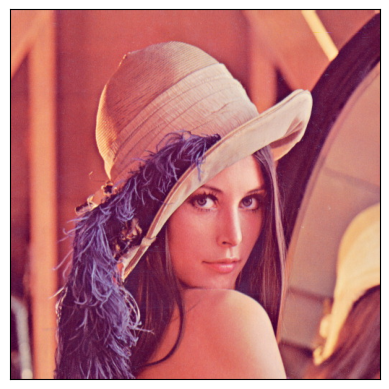

In [12]:
import cv2 as cv2
import matplotlib.pyplot as plt

img = cv.imread("lena.jpg", -1)
cv.imshow("Image", img)
img = cv2.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

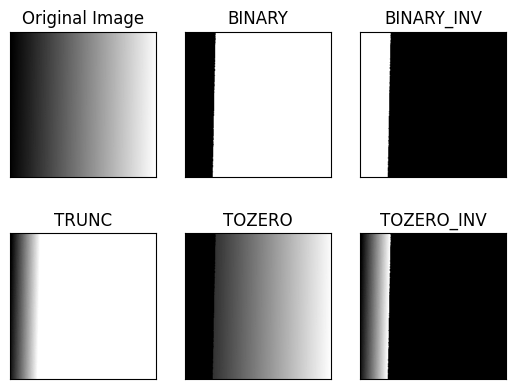

In [15]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv2.imread('gradient.png',0)
_, th1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(img, 50, 255, cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(img, 50, 255, cv2.THRESH_TOZERO)
_, th5 = cv2.threshold(img, 50, 255, cv2.THRESH_TOZERO_INV)


titles = ['Original Image', 'BINARY', 'BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images =[img, th1, th2, th3,th4,th5]

for i in range(6):
   plt.subplot(2,3,i+1)
   plt.imshow(images[i], 'gray')
   plt.title(titles[i])
   plt.xticks([])
   plt.yticks([])
plt.show()

__Morphological Transformations__

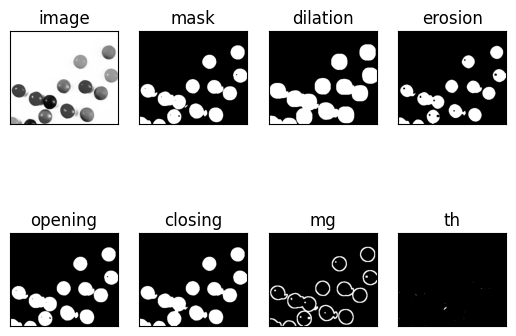

In [49]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('smarties.png', cv2.IMREAD_GRAYSCALE)
# cv.imshow("Image", img)
# cv.waitKey(0)
# cv.destroyAllWindows()

_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5), np.uint)

# dãn nở
dilation = cv2.dilate(mask, kernel, iterations=2)
# mài mòn
erosion = cv2.erode(mask, kernel, iterations=1)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) # opening = erosion + dilation
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) # closing = dilation + erosion
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel) # làm nổi bật các sự thay đổi về biên trong ảnh. Phép toán này tính toán sự khác biệt giữa kết quả của dilation (nở) và erosion (mài mòn). 
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel) # giúp làm nổi bật các chi tiết sáng nhỏ trong ảnh. Phép toán top hat tính toán sự khác biệt giữa ảnh gốc và ảnh đã trải qua phép opening (mở).
titles = ['image', 'mask','dilation','erosion','opening','closing','mg', 'th']
images = [img, mask,dilation,erosion,opening,closing, mg,th]

for i in range(8):
   plt.subplot(2,4,i+1)
   plt.imshow(images[i], 'gray')
   plt.title(titles[i])
   plt.xticks([])
   plt.yticks([])

plt.show()

__Smoothing Images | Blurring Images OpenCV__

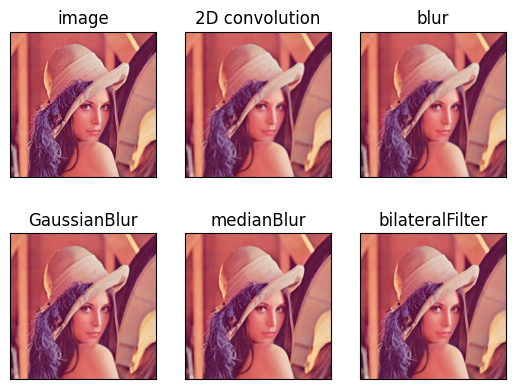

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)
# mean filter
blur = cv2.blur(img,(5,5))

gblur = cv2.GaussianBlur(img,(5,5),0)
median = cv2.medianBlur(img,5)
bilateralFilter = cv2.bilateralFilter(img,9,75,75)
titles = ['image', '2D convolution','blur', 'GaussianBlur','medianBlur','bilateralFilter']
images = [img, dst,blur,gblur,median,bilateralFilter]

for i in range(6):
   plt.subplot(2,3,i+1)
   plt.imshow(images[i],'gray')
   plt.title(titles[i])
   plt.xticks([]), plt.yticks([])

plt.show()


__Image Gradients and Edge Detection__

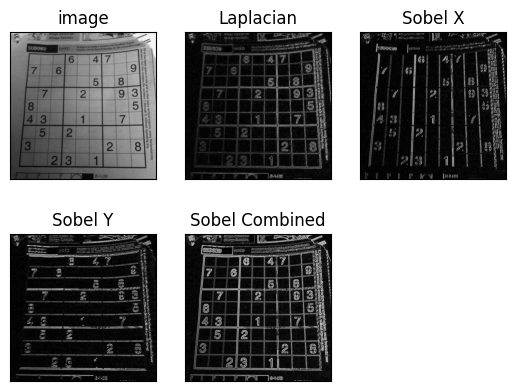

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sudoku.png', cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img,cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F,1,0)
sobelY = cv2.Sobel(img, cv2.CV_64F,0,1)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobelCombined = cv2.bitwise_or(sobelX,sobelY)

titles = ['image', 'Laplacian', 'Sobel X', 'Sobel Y', 'Sobel Combined']
images = [img, lap, sobelX, sobelY, sobelCombined]

for i in range(5):
   plt.subplot(2,3,i+1)
   plt.imshow(images[i], 'gray')
   plt.title(titles[i])
   plt.xticks([])
   plt.yticks([])
plt.show()